***
# Tensorflow models
In this notebook a simle Fully connected neural network and a bidirectional LSTM are tested.

Both models show good training results, but fail at regularization.  This concludes to either not having enough training data, or some other error in the data.

***
## Simple Neural Network with embedding layer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import models
import sys
sys.path.append('tf_models')
from train import train
# Add functions path
sys.path.append('../Functions')

In [17]:
from datasets import load_stratified_dataset
from sklearn.model_selection import train_test_split
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=1000, random_seed=10)
X_train, X_test, y_train, y_test = train_test_split(df.text, df.category)

In [3]:
train(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

Tensorflow version 2.3.1
Load Datasets


(0.9842134118080139, 0.6979695558547974, 0.661142885684967)

### Test different sequence lengths

In [4]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(10,1000,10):
    d = int(d)
    print(d, end='\r')
    tr, v, te = train(sequence_length=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets


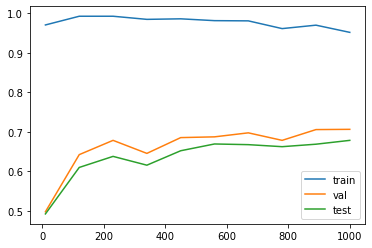

In [5]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different embedding dimensions

In [6]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(6,30,10):
    d = int(d)
    print(d, end='\r')
    tr, v, te = train(embedding_dim=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets


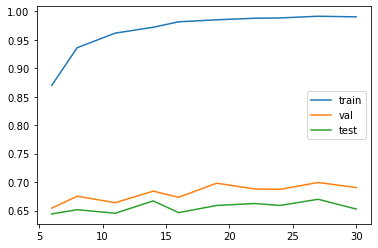

In [7]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different vocab sizes

In [8]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(5000,20000,10):
    d = int(d)
    print(d, end='\r')
    tr, v, te = train(vocab_size=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets


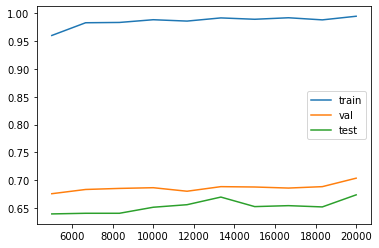

In [9]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different dropouts

In [10]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(0.1, 0.5, 5):
    print(d, end='\r')
    tr, v, te = train(dropout=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets


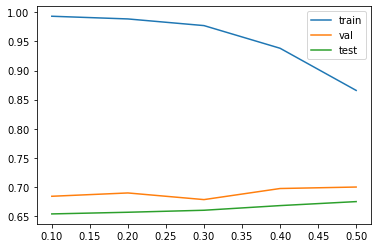

In [11]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different regularizations

In [12]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(0, 3, 5):
    print(d, end='\r')
    tr, v, te = train(regularization=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets


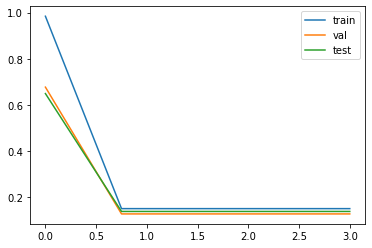

In [13]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different node sizes

In [27]:
train_acc = []
val_acc = []
test_acc = []
n_value = []
d_value = []
for n in [16, 64, 128]:
    for d in [0.2, 0.4, 0.6]:
    
        print(str(n) + str(d), end='\r')
        tr, v, te = train(tmp=n, dropout=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
        train_acc.append(tr)
        val_acc.append(v)
        test_acc.append(te)
        n_value.append(n)
        d_value.append(d)

Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets


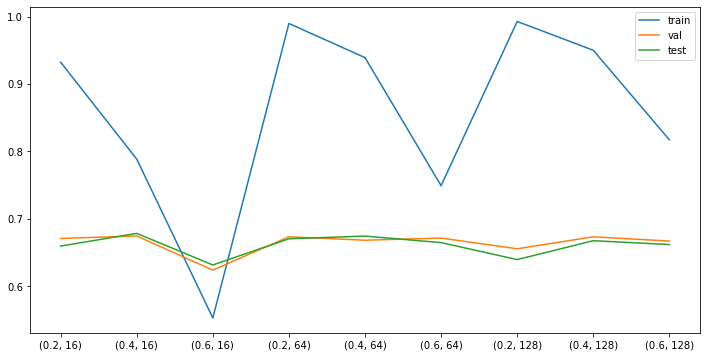

In [28]:
x = [str(i) for i in zip(d_value, n_value)]
plt.figure(figsize=(12,6))
plt.plot(x, train_acc, label='train')
plt.plot(x, val_acc, label='val')
plt.plot(x, test_acc, label='test')
plt.legend();

### Test different training sizes

In [14]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in [10, 100, 500, 1000, 5000, 10000]:
    print(d, end='\r')
    df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_big.csv', labels='category', samples_per_label=d, random_seed=10)
    X_train, X_test, y_train, y_test = train_test_split(df.text, df.category)

    tr, v, te = train(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d*7)

Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets
Tensorflow version 2.3.1
Load Datasets


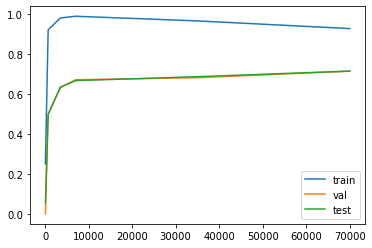

In [15]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

***
## Bidirectional LSTM with embedding layer
Calculated on Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import models
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/my_notebook/tf_models')
from train import train
# Add functions path
sys.path.append('/content/drive/MyDrive/Colab Notebooks/my_notebook/Functions')

In [3]:
from datasets import load_stratified_dataset
from sklearn.model_selection import train_test_split
df = load_stratified_dataset(path='/content/drive/MyDrive/Colab Notebooks/my_notebook/dataset_categories_train.csv', labels='category', samples_per_label=300000, random_seed=10)
X_train, X_test, y_train, y_test = train_test_split(df.text_lem, df.category)

Smallest sample size in dataset is 12026 samples!


Tensorflow version 2.3.0
Load Datasets
Epoch 1/30
87/87 [==============================] - 17s 196ms/step - loss: 1.8206 - categorical_accuracy: 0.3234 - val_loss: 1.9474 - val_categorical_accuracy: 0.1625
Epoch 2/30
87/87 [==============================] - 15s 173ms/step - loss: 1.0086 - categorical_accuracy: 0.6674 - val_loss: 1.8408 - val_categorical_accuracy: 0.1952
Epoch 3/30
87/87 [==============================] - 15s 174ms/step - loss: 0.7808 - categorical_accuracy: 0.7550 - val_loss: 1.5982 - val_categorical_accuracy: 0.3715
Epoch 4/30
87/87 [==============================] - 15s 173ms/step - loss: 0.6591 - categorical_accuracy: 0.7932 - val_loss: 1.2496 - val_categorical_accuracy: 0.5658
Epoch 5/30
87/87 [==============================] - 15s 172ms/step - loss: 0.5698 - categorical_accuracy: 0.8211 - val_loss: 0.9438 - val_categorical_accuracy: 0.6936
Epoch 6/30
87/87 [==============================] - 15s 173ms/step - loss: 0.5021 - categorical_accuracy: 0.8442 - val_loss: 0

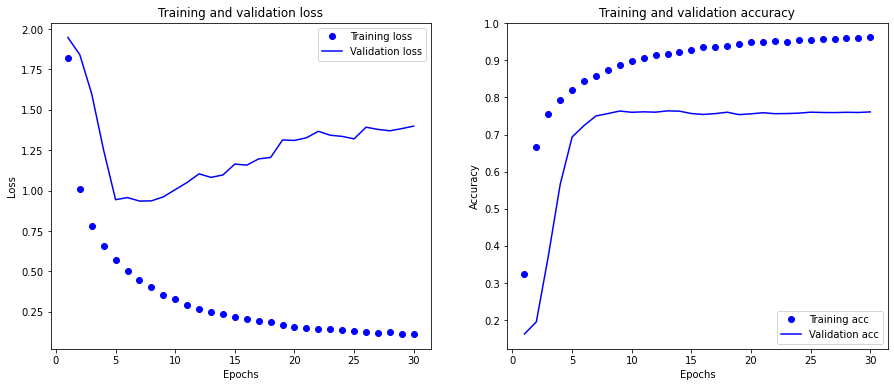

(0.9618273973464966, 0.7611002326011658, 0.7587189674377441)

In [4]:
train(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

### Test different node sizes

In [7]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(8,100,5):
    d = int(d)
    print(d, end='\r')
    tr, v, te = train(tmp=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets


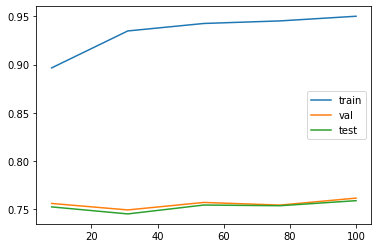

In [8]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different dropouts

In [17]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(0.1, 0.8, 5):
    print(d, end='\r')
    tr, v, te = train(dropout=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets


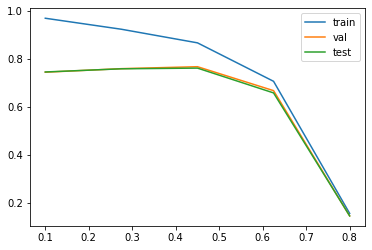

In [18]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different Sequence length

In [19]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(10,3000,5):
    d = int(d)
    print(d, end='\r')
    tr, v, te = train(sequence_length=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets


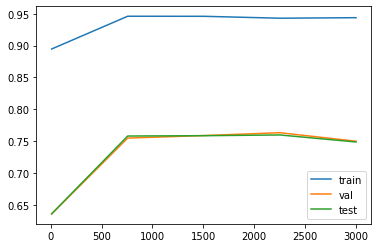

In [20]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different embedding dimensions

In [13]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(6,30,5):
    d = int(d)
    print(d, end='\r')
    tr, v, te = train(embedding_dim=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets


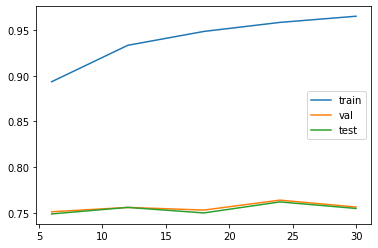

In [14]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();

### Test different vocabulary sizes

In [15]:
train_acc = []
val_acc = []
test_acc = []
x_value = []
for d in np.linspace(5000,20000,5):
    d = int(d)
    print(d, end='\r')
    tr, v, te = train(vocab_size=d, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
    train_acc.append(tr)
    val_acc.append(v)
    test_acc.append(te)
    x_value.append(d)

Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets
Tensorflow version 2.3.0
Load Datasets


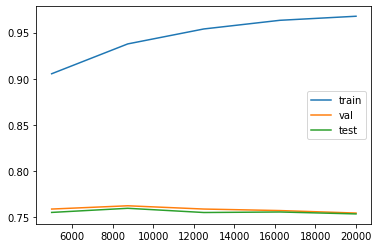

In [16]:
plt.plot(x_value, train_acc, label='train')
plt.plot(x_value, val_acc, label='val')
plt.plot(x_value, test_acc, label='test')
plt.legend();